# 2. Caraterísticas do conjunto de dados e análise exploratória de dados

- **Análise exploratória de dados:** Este conjunto de dados tem muitos valores duplicados (308381), o que cria um enviesamento que não é bom para o modelo de aprendizagem automática. O número de valores em falta e de valores infinitos em duas colunas “Flow Bytes/s” e “Flow Packets/s” é muito reduzido em comparação com o tamanho do conjunto de dados, que é de apenas 0,06% (1564). No entanto, os valores foram tratados utilizando métodos adequados.

## --------------------------------------
## 2.1 Carregar, visualizar e analisar dados
## --------------------------------------

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
sns.set(style='darkgrid')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings('ignore', category=UserWarning, module='pandas')

In [21]:
df_combined = pd.read_csv('datasets/CICIDS2017/CIC_IDS_2017_Combinado.csv')

In [22]:
# Exibe informações gerais do DataFrame
print("### Informações Gerais do Dataset:")
df_combined.info()

### Informações Gerais do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IA

In [23]:
# Mostra o número total de linhas e colunas
print(f"\nNúmero total de linhas: {df_combined.shape[0]}")
print(f"Número total de colunas: {df_combined.shape[1]}")


Número total de linhas: 2830743
Número total de colunas: 79


In [24]:
# Exibe estatísticas descritivas (para colunas numéricas)
pd.options.display.max_rows = 80
print('Overview das Colunas:')
df_combined.describe().transpose()

Overview das Colunas:


,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-1.300000e+01,155.000000,31316.000000,3.204828e+06,1.200000e+08
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.000000e+00,2.000000,2.000000,5.000000e+00,2.197590e+05
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.000000e+00,1.000000,2.000000,4.000000e+00,2.919220e+05
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.000000e+00,12.000000,62.000000,1.870000e+02,1.290000e+07
Total Length of Bwd Packets,2830743.0,1.616264e+04,2.263088e+06,0.000000e+00,0.000000,123.000000,4.820000e+02,6.554530e+08
Fwd Packet Length Max,2830743.0,2.075999e+02,7.171848e+02,0.000000e+00,6.000000,37.000000,8.100000e+01,2.482000e+04
Fwd Packet Length Min,2830743.0,1.871366e+01,6.033935e+01,0.000000e+00,0.000000,2.000000,3.600000e+01,2.325000e+03
Fwd Packet Length Mean,2830743.0,5.820194e+01,1.860912e+02,0.000000e+00,6.000000,34.000000,5.000000e+01,5.940857e+03
Fwd Packet Length Std,2830743.0,6.891013e+01,2.811871e+02,0.000000e+00,0.000000,0.000000,2.616295e+01,7.125597e+03


In [25]:
# Visualiza as 5 primeiras linhas do DataFrame
pd.options.display.max_columns = 80
df_combined

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.000000,3,3,3,3.00000,0.00000,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.000000,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,1.100917e+05,18348.623850,109.0,0.000000,109,109,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,2.307692e+05,38461.538460,52.0,0.000000,52,52,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,3.529412e+05,58823.529410,34.0,0.000000,34,34,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.000000,3,3,3,3.00000,0.00000,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.000000,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,76,76,76.0,0.0,8.194940e+03,186.248642,6443.0,13617.579480,30780,3,30832,10277.33333,17755.84381,30780,4,3,3.0,0.0,3,3,0,0,0,0,80,64,124.165761,62.082881,28,76,41.714286,23.421602,548.571429,0,0,0,0,0,0,0,0,0,48.666667,28.0,76.0,80,0,0,0,0,0,0,4,112,2,152,-1,-1,3,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,181,181,181.0,0.0,1.376543e+06,12345.679010,108.0,183.597386,320,2,2,2.00000,0.00000,2,2,2,2.0,0.0,2,2,0,0,0,0,40,40,6172.839506,6172.839506,42,181,97.600000,76.133435,5796.300000,0,0,0,0,0,0,0,0,1,122.000000,42.0,181.0,40,0,0,0,0,0,0,2,84,2,362,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,6,6,6.0,0.0,4.512195e+05,36585.365850,41.0,52.325902,78,4,4,4.00000,0.00000,4,4,0,0.0,0.0,0,0,1,0,0,0,64,20,24390.243900,12195.121950,0,31,17.000000,1

## ------------------------------
## 2.2 Limpeza de dados
## ------------------------------

### 1. Remover duplicados

In [26]:
dups = df_combined[df_combined.duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 308381


In [27]:
df_combined.drop_duplicates(inplace=True)
print(f"Número de linhas após remoção de duplicatas: {df_combined.shape[0]}")

Número de linhas após remoção de duplicatas: 2522362


### 2. Verificação e tratamento de valores ausentes

In [28]:
# Verifica as colunas que possuem valores infinitos
colunas_com_infinito = df_combined.columns[df_combined.isin([np.inf, -np.inf]).any()]
# Conta quantos valores infinitos existem em cada uma dessas colunas
quantidade_infinito = df_combined[colunas_com_infinito].isin([np.inf, -np.inf]).sum()
# Exibe as colunas e a quantidade de valores infinitos
quantidade_infinito

Flow Bytes/s      1211
Flow Packets/s    1564
dtype: int64

In [29]:
# Verifica se há valores infinitos no DataFrame
df_combined.replace([np.inf, -np.inf], np.nan, inplace=True)  # Substitui infinitos por NaN

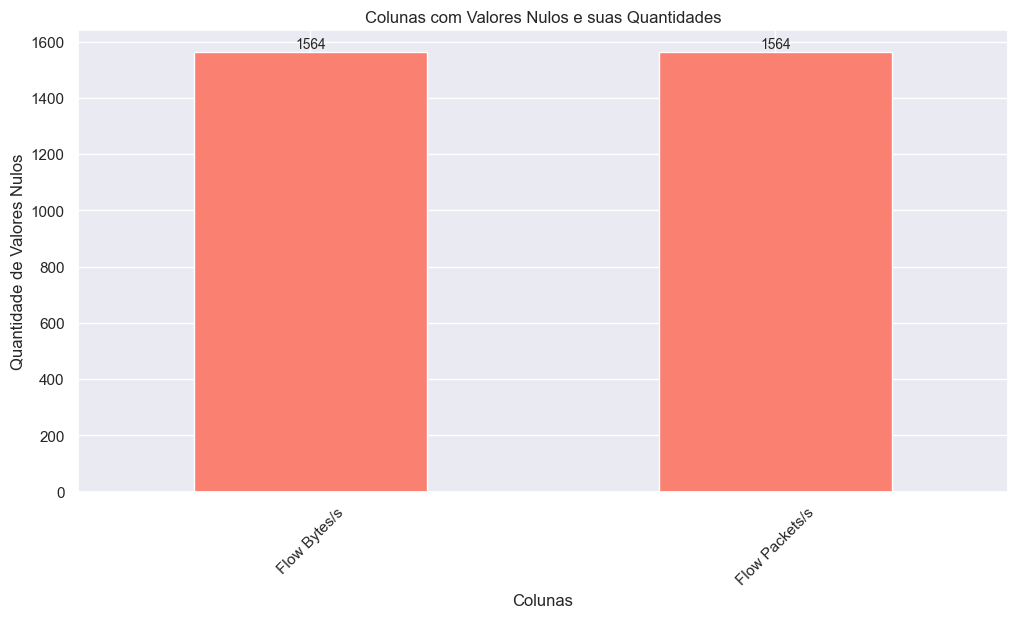

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que df_combined já esteja carregado
# Verifica a quantidade de valores nulos por coluna
nulos_por_coluna = df_combined.isnull().sum()

# Filtra apenas as colunas com pelo menos um valor nulo
nulos_por_coluna = nulos_por_coluna[nulos_por_coluna > 0]

# Plotando o gráfico
plt.figure(figsize=(12, 6))
nulos_por_coluna.plot(kind='bar', color='salmon')

# Adicionando título e rótulos
plt.title('Colunas com Valores Nulos e suas Quantidades')
plt.xlabel('Colunas')
plt.ylabel('Quantidade de Valores Nulos')
plt.xticks(rotation=45)

# Exibindo os valores acima das barras
for i, valor in enumerate(nulos_por_coluna):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=10)

plt.show()


In [31]:
# Identifica colunas com valores ausentes
valores_nulos = df_combined.isnull().sum()
valores_nulos = valores_nulos[valores_nulos > 0]
valores_nulos

Flow Bytes/s      1564
Flow Packets/s    1564
dtype: int64

In [32]:
# Calcula o percentual de valores ausentes em cada coluna
percentual_ausentes = df_combined.isnull().mean() * 100
# Filtra e exibe apenas as colunas com valores ausentes
colunas_com_ausentes = percentual_ausentes[percentual_ausentes > 0]
colunas_com_ausentes

Flow Bytes/s      0.062005
Flow Packets/s    0.062005
dtype: float64

In [33]:
# Tratar valores ausentes nas colunas 'Flow Bytes/s' e 'Flow Packets/s' usando a mediana
df_combined['Flow Bytes/s'].fillna(df_combined['Flow Bytes/s'].median(), inplace=True)
df_combined['Flow Packets/s'].fillna(df_combined['Flow Packets/s'].median(), inplace=True)

# Verifica se os valores ausentes foram preenchidos
df_combined[['Flow Bytes/s', 'Flow Packets/s']].isnull().sum()

Flow Bytes/s      0
Flow Packets/s    0
dtype: int64

## 3. Analisar Padrões Utilizando Visualizações

In [34]:
df_combined['Label'].value_counts()

Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [35]:
# Mapeamento das categorias para grupos mais amplos
label_mapping = {
    'BENIGN': 'BENIGN',
    'DoS Hulk': 'DoS',
    'DDoS': 'DDoS',
    'PortScan': 'PortScan',
    'DoS GoldenEye': 'DoS',
    'FTP-Patator': 'Brute Force',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Web Attack � Sql Injection': 'Web Attack',
    'Heartbleed': 'Heartbleed'
}

# Aplicando o mapeamento à coluna 'Label'
df_combined['Label'] = df_combined['Label'].map(label_mapping)

In [36]:
df_combined['Label'].value_counts()

Label
BENIGN          2096484
DoS              193748
DDoS             128016
PortScan          90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

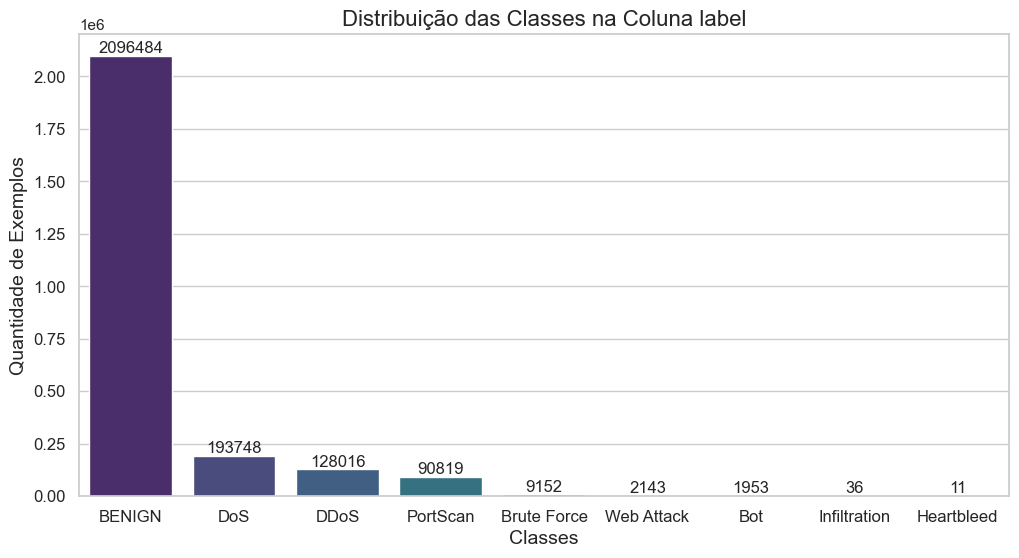

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contagem das classes na coluna 'label'
contagem_classes = df_combined['Label'].value_counts()

# Configurações do estilo do gráfico
sns.set(style="whitegrid", palette="muted")

# Criando o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=contagem_classes.index, y=contagem_classes.values, palette='viridis')

# Adicionando título e rótulos
plt.title('Distribuição das Classes na Coluna label', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Quantidade de Exemplos', fontsize=14)

# Adicionando os valores no topo das barras
for i, valor in enumerate(contagem_classes.values):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=12)

# Melhorando a rotação dos rótulos no eixo x
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [38]:
# Renomeando a coluna 'Label' para 'Attack Types'
df_combined.rename(columns={'Label': 'Attack Types'}, inplace=True)

# Exibindo as primeiras linhas para verificar a alteração
df_combined.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack Types
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [39]:
from sklearn.preprocessing import LabelEncoder

# Criando o codificador
label_encoder = LabelEncoder()
# Codificando a coluna 'Attack Types'
df_combined['Attack Types Encoded'] = label_encoder.fit_transform(df_combined['Attack Types'])

In [40]:
# Imprimindo o mapeamento de valores codificados para os tipos de ataque originais
attack_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

print("Mapping of Encoded Values to Attack Types:")
for encoded_value, attack_type in attack_mapping.items():
    print(f"Encoded Value {attack_type}: {encoded_value}")

Mapping of Encoded Values to Attack Types:
Encoded Value 0: BENIGN
Encoded Value 1: Bot
Encoded Value 2: Brute Force
Encoded Value 3: DDoS
Encoded Value 4: DoS
Encoded Value 5: Heartbleed
Encoded Value 6: Infiltration
Encoded Value 7: PortScan
Encoded Value 8: Web Attack


In [41]:
corr = df_combined.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

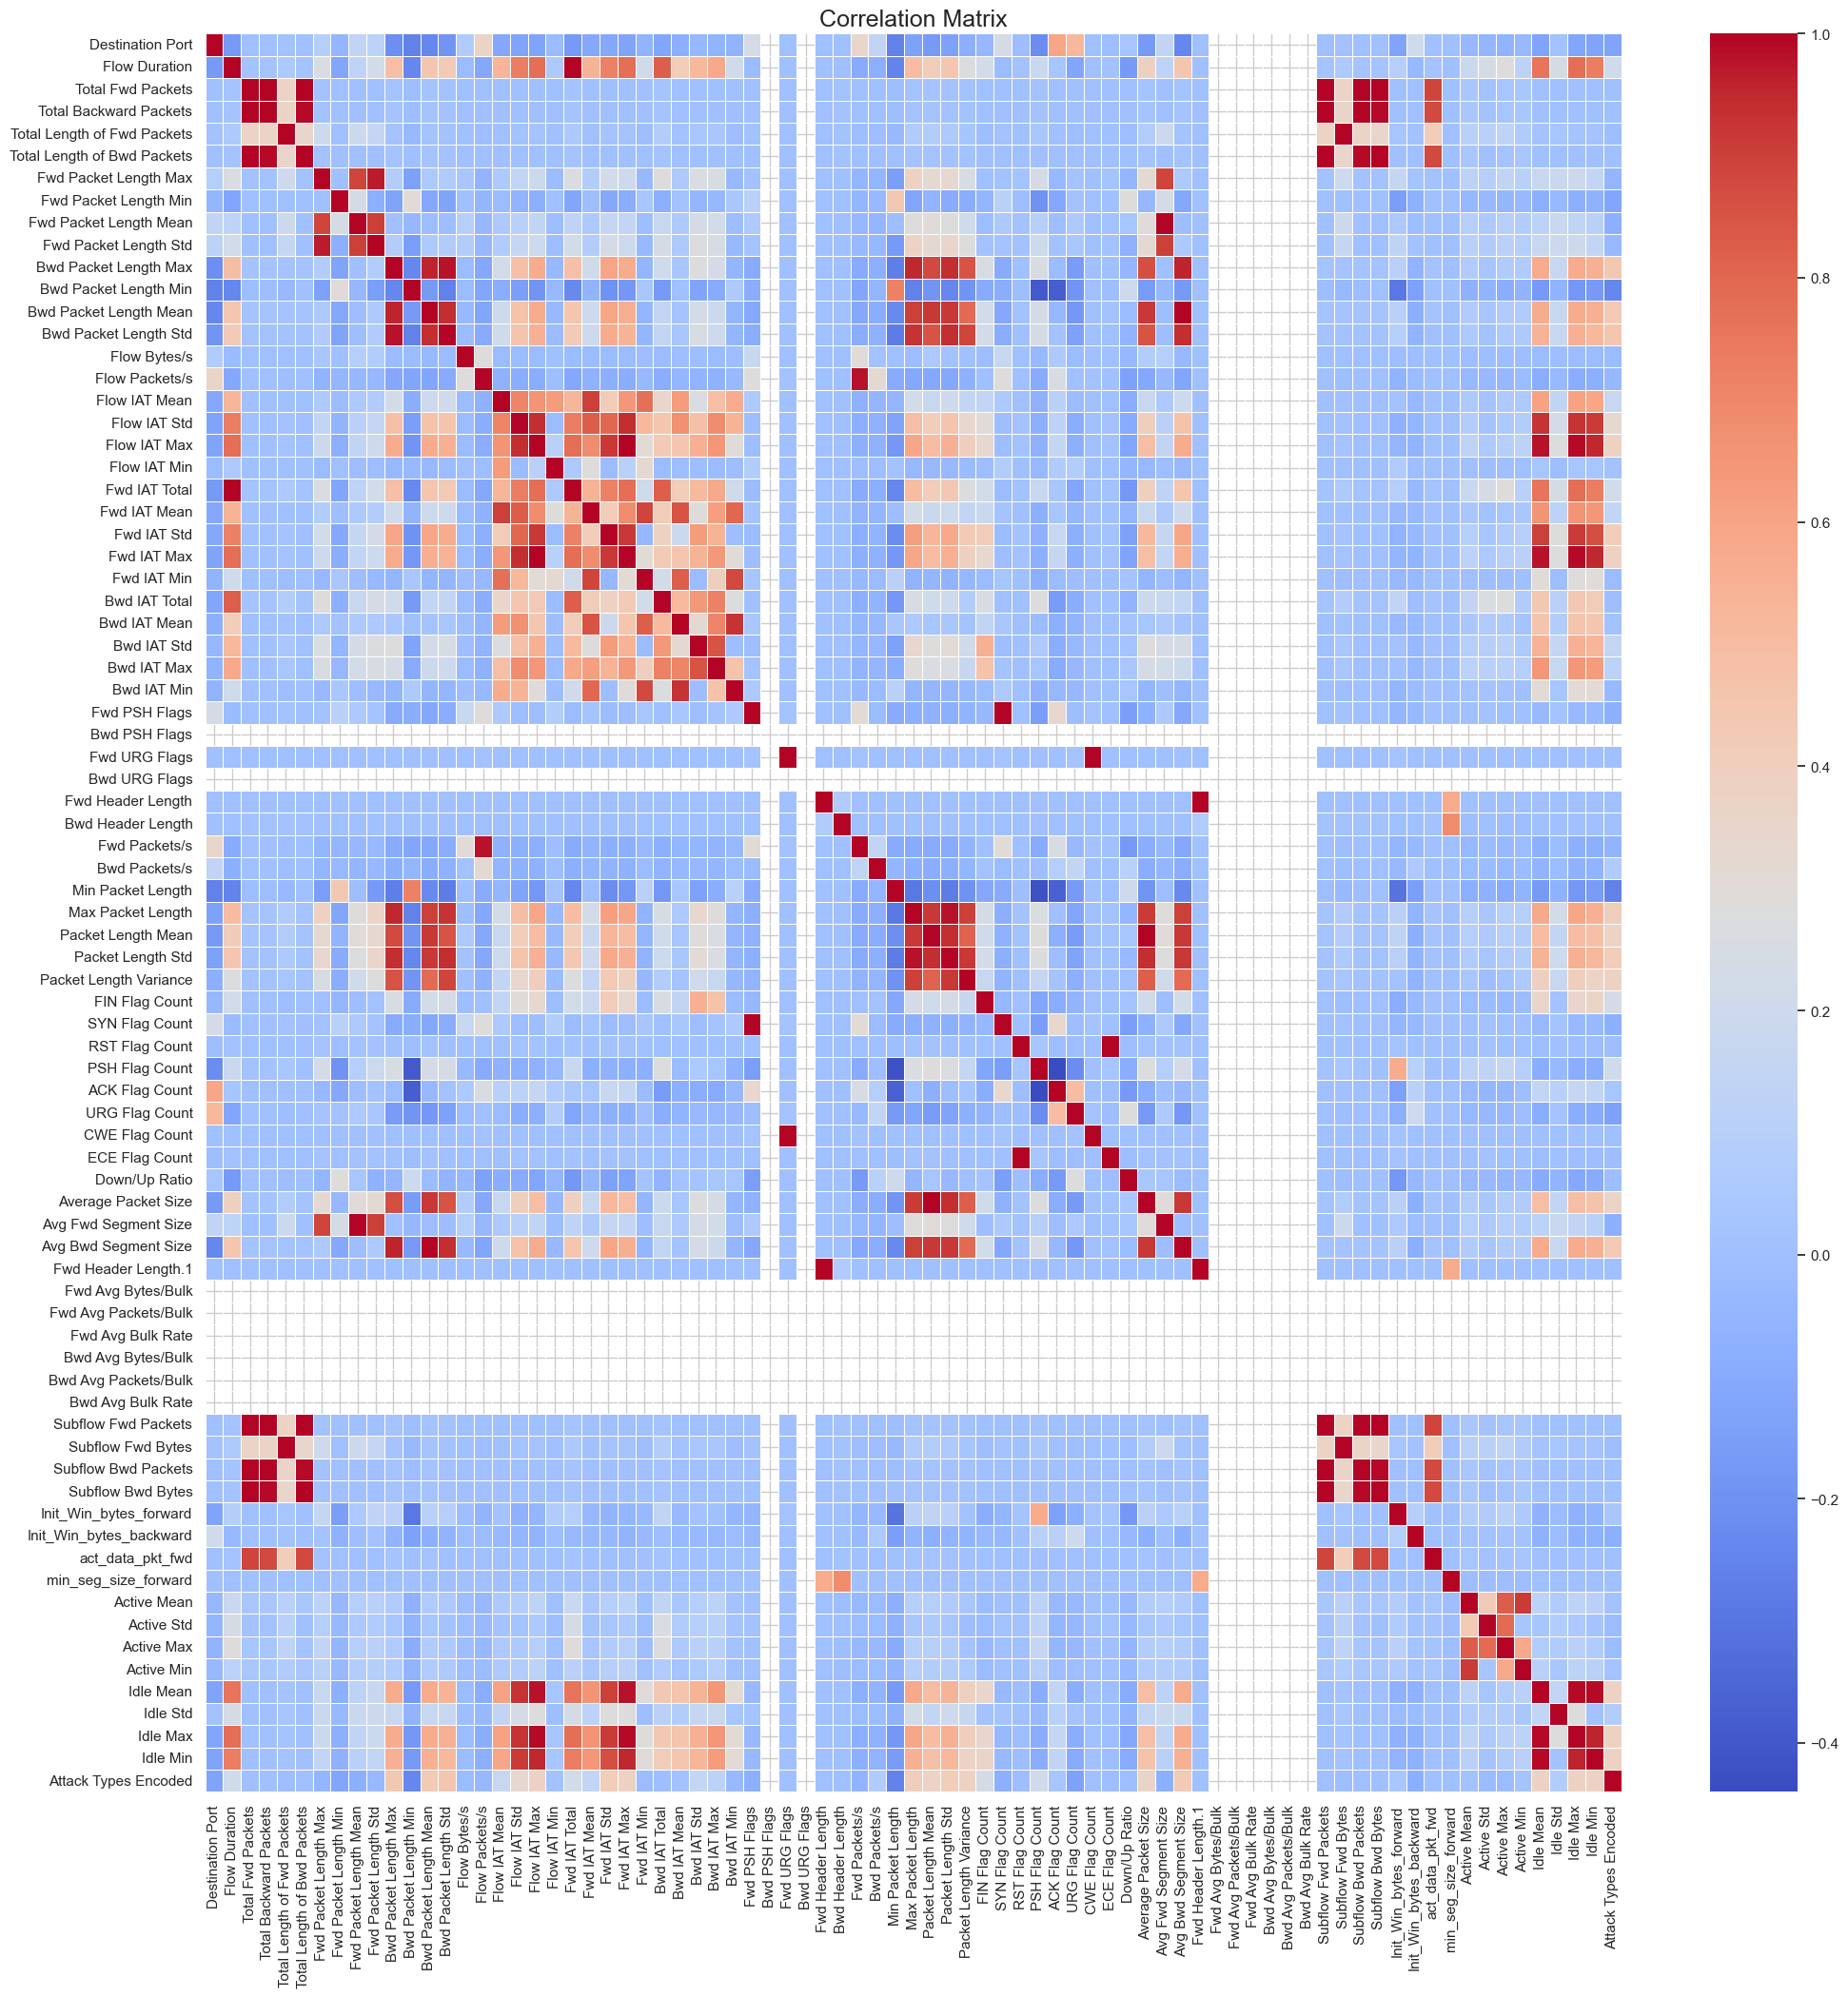

In [42]:
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [43]:
# Calculando a matriz de correlação do DataFrame
pos_corr_features = corr['Attack Types Encoded'][(corr['Attack Types Encoded'] > 0) & (corr['Attack Types Encoded'] < 1)].index.tolist()
# Exibindo as features com correlação positiva
print("Features com correlação positiva com 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Types Encoded']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Features com correlação positiva com 'Attack Number':

1.  Flow Duration            :0.21
2.  Bwd Packet Length Max    :0.44
3.  Bwd Packet Length Mean   :0.43
4.  Bwd Packet Length Std    :0.45
5.  Flow IAT Mean            :0.17
6.  Flow IAT Std             :0.33
7.  Flow IAT Max             :0.38
8.  Flow IAT Min             :0.01
9.  Fwd IAT Total            :0.22
10. Fwd IAT Mean             :0.15
11. Fwd IAT Std              :0.41
12. Fwd IAT Max              :0.38
13. Bwd IAT Mean             :0.01
14. Bwd IAT Std              :0.16
15. Bwd IAT Max              :0.12
16. Bwd Packets/s            :0.07
17. Max Packet Length        :0.4
18. Packet Length Mean       :0.37
19. Packet Length Std        :0.41
20. Packet Length Variance   :0.38
21. FIN Flag Count           :0.23
22. PSH Flag Count           :0.21
23. ACK Flag Count           :0.03
24. Average Packet Size      :0.36
25. Avg Bwd Segment Size     :0.43
26. Init_Win_bytes_forward   :0.04
27. Active Mean              :0.01
2

In [44]:
# Calculando o desvio padrão de cada coluna
std_devs = df_combined.std(numeric_only = True)

# Verificando as colunas com desvio padrão zero
zero_std_columns = std_devs[std_devs == 0].index.tolist()

# Exibindo as colunas com desvio padrão zero
zero_std_columns

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

- Mapeámos cada etiqueta para o tipo de ataque correspondente. Isto agrupa ataques semelhantes e proporciona uma forma mais fácil e mais interpretável de analisar o conjunto de dados e identificar padrões nos diferentes tipos de ataques.

- Para traçar a matriz de correlação, codificámos a coluna “Tipo de ataque” e traçámos o mapa de calor. A partir do mapa de calor, observamos que existem muitos pares de caraterísticas altamente correlacionadas. As caraterísticas altamente correlacionadas no conjunto de dados são problemáticas e conduzem a um sobreajuste. Existe uma correlação positiva quando uma variável diminui à medida que a outra diminui ou quando uma variável aumenta à medida que a outra aumenta. Existem 32 caraterísticas com correlações positivas que podem ajudar a prever a caraterística alvo.

- As colunas com desvio padrão zero têm o mesmo valor em todas as linhas. Estas colunas não têm qualquer variância. Significa simplesmente que não existe uma relação significativa com quaisquer outras colunas, o que resulta num coeficiente de correlação NaN. Estas colunas não podem ajudar a diferenciar as classes ou grupos de dados. Assim, estas colunas de desvio padrão zero não contribuem para a matriz de correlação e aparecerão em branco no mapa de calor. Isto pode ser útil durante o processamento de dados, uma vez que podemos eliminar as colunas se descobrirmos que estas colunas não têm variação.

In [45]:
df_combined.drop('Attack Types Encoded', axis = 1, inplace = True)

In [46]:
df_combined.groupby('Attack Types').first()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Attack Types,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BENIGN,54865,3,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,4.000000e+06,666666.666700,3.000000e+00,0.000000e+00,3,3,3,3.000000e+00,0.000000e+00,3,3,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,0,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Bot,8080,60202640,9,9,322,256,322,0,35.777778,107.333333,256,0,28.444444,85.333333,9.600908e+00,0.298990,3.541332e+06,4.901981e+06,10200000,47,51200000,6.396442e+06,5.268490e+06,10200000,234,60200000,7.518954e+06,4.645137e+06,10300000,637,0,0,0,0,296,296,0.149495,0.149495,0,322,30.421053,91.783753,8.424257e+03,0,0,0,1,0,0,0,0,1,32.111111,35.777778,28.444444,296,0,0,0,0,0,0,9,322,9,256,29200,110,1,32,63678.2,22252.53596,103175,50911,10200000.0,34941.27201,10200000,10100000
Brute Force,80,5216127,3,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,0.766852,1.738709e+06,3.010454e+06,5214882,124,5216127,2.608064e+06,3.686598e+06,5214882,1245,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,104,40,0.575139,0.191713,0,0,0.000000,0.000000,0.000000e+00,0,0,0,1,0,0,0,0,0,0.000000,0.000000,0.000000,104,0,0,0,0,0,0,3,0,1,0,29200,28960,0,32,0.0,0.00000,0,0,0.0,0.00000,0,0
DDoS,80,1293792,3,7,26,11607,20,0,8.666667,10.263203,5840,0,1658.142857,2137.297080,8.991399e+03,7.729218,1.437547e+05,4.308658e+05,1292730,2,747,3.735000e+02,5.239661e+02,744,3,1293746,2.156243e+05,5.276719e+05,1292730,2,0,0,0,0,72,152,2.318765,5.410452,0,5840,1057.545455,1853.437529,3.435231e+06,0,0,0,1,0,0,0,0,2,1163.300000,8.666667,1658.142857,72,0,0,0,0,0,0,3,26,7,11607,8192,229,2,20,0.0,0.00000,0,0,0.0,0.00000,0,0
DoS,80,5169956,8,6,1101,4222,410,0,137.625000,185.758628,3525,0,703.666667,1395.868284,1.029603e+03,2.707953,3.976889e+05,1.368409e+06,4951173,112,218783,3.125471e+04,3.068629e+04,78311,219,5169833,1.033967e+06,2.218975e+06,5002421,840,0,0,0,0,172,132,1.547402,1.160551,0,3525,354.866667,895.115146,8.012311e+05,0,0,0,1,0,0,0,0,0,380.214286,137.625000,703.666667,172,0,0,0,0,0,0,8,1101,6,4222,8192,254,7,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Heartbleed,444,119302728,2685,1729,8299,7556917,517,0,3.090875,16.858421,17376,0,4370.686524,2566.935004,6.341193e+04,36.998316,2.703438e+04,1.746258e+05,5024984,0,119000000,4.444951e+04,2.224617e+05,5025702,0,119000000,6.904091e+04,2.738674e+05,5024984,1,0,0,0,0,85928,55336,22.505772,14.492544,0,17376,1713.525708,2669.389319,7.125639e+06,0,0,0,1,0,0,0,0,0,1713.913910,3.090875,4370.686524,85928,0,0,0,0,0,0,2685,8299,1729,7556917,29200,235,118,32,2217.0,0.00000,2217,2217,5024984.0,0.00000

In [47]:
# (Opcional) Salva o DataFrame limpo em um novo arquivo CSV
df_combined.to_csv('datasets/CICIDS2017/CIC_IDS_2017_pre_Limpo.csv', index=False)

In [48]:
df_combined.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co